# CLASSIFICANDO RENDA DE INDIVÍDUOS ADULTOS DE UM CENSO AMERICANO

Nesse projeto irei usar dados de um censo americano determinar se o indvíduo ganha acima de US$ 50.000 (cinquenta mil dólares) anualmente. Para o processo de classificação usarei os atributos descritos abaixo:


**1)** age(idade);

**2)** workclass(classe de trabalho): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked;

**3)** fnlwgt (peso final);

**4)** education (educação): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool;

**5)** education-num (educação em anos);

**6)** marital-status (situação conjugal): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse;

**7)** occupation (ocupação) : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces;

**8)** relationship (relação): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried;

**9)** race (raça): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black;

**10)** sex (sexo): Female, Male;

**11)** capital-gain (capital ganho);

**12)** capital-loss (capital perdido);

**13)** hours-per-week (horas de trabalho por semana);

**14)** native-country (país nativo): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands;

**15)** Income (Renda) :>50K (acima de USS 50.000), <=50K (igual ou abaixo de USS 50.000).


Os dados, em questão, podem ser obtidos [aqui](https://archive.ics.uci.edu/ml/datasets/Adult).

**Para o processo de classificação usaremos modelos de Machine Learning abaixo:**

1) Regressão Logística;

2) SVM

3) X Gradiente Boost

4) Random Forest

5) Decision Tree

6) Stochastic Gradient Descent

7) K-nearest neighbor

8) GaussianNB

9) Extra-trees

10) Multilayer Perceptron

**ETAPAS**

1) Importação das Bibliotecas

2) Análise Exploratória

3) Tratamento dos dados

4) Definição da Baseline

5) Separação dos dados de treino e teste

6) Modelagem e avaliação dos modelos

7) Conclusão

# IMPORTAÇÃO DAS BIBLIOTECAS

In [91]:
#Bibliotecas que serão usadas para análise e tratamento dos dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ANÁLISE EXPLORATÓRIA DE DADOS

In [92]:
#Importando o dataset

adult=pd.read_csv('adult.csv')

#Para visualizar todas as colunas do dataset, se preciso
pd.set_option("display.max_columns",200)

In [93]:
#Visualizando as colunas do dataset

adult.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [94]:
adult.info()

#6 colunas são de números inteiros

#9 colunas são objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [95]:
adult.isna().sum()

#nenhuma coluna possui valores faltantes

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [96]:
display(adult.describe(include=['O']))
display(adult.describe())

#Estatísticas descritivas de cada coluna

#A primeira tabela refere-se as colunas que são objetos

#A segunda tabela, de colunas com valores inteiros

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
#Transformando income em categóricas numéricas

inteiros=LabelEncoder().fit_transform(adult['income'])
adult['income']=inteiros

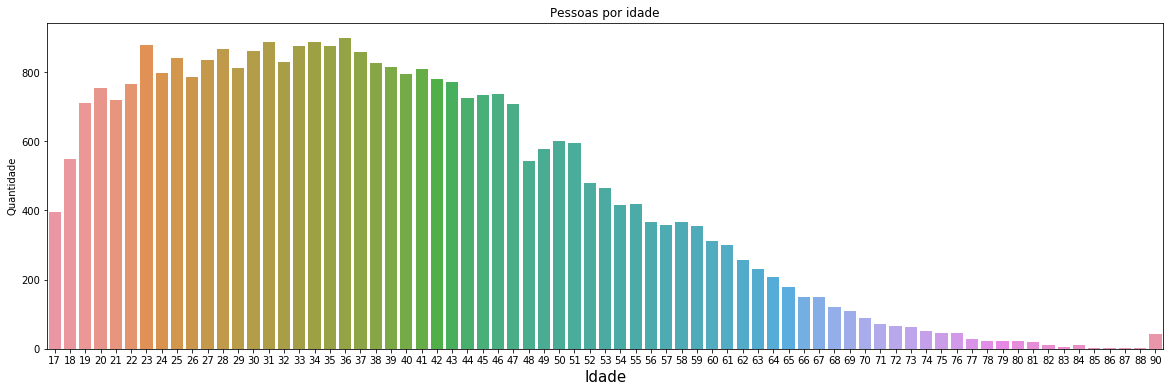

In [99]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=adult)
plt.xlabel('Idade',size=15)
plt.ylabel('Quantidade')
plt.title('Pessoas por idade')
plt.show()
#A frequência maior está com pessoas com idade menor que 60 anos

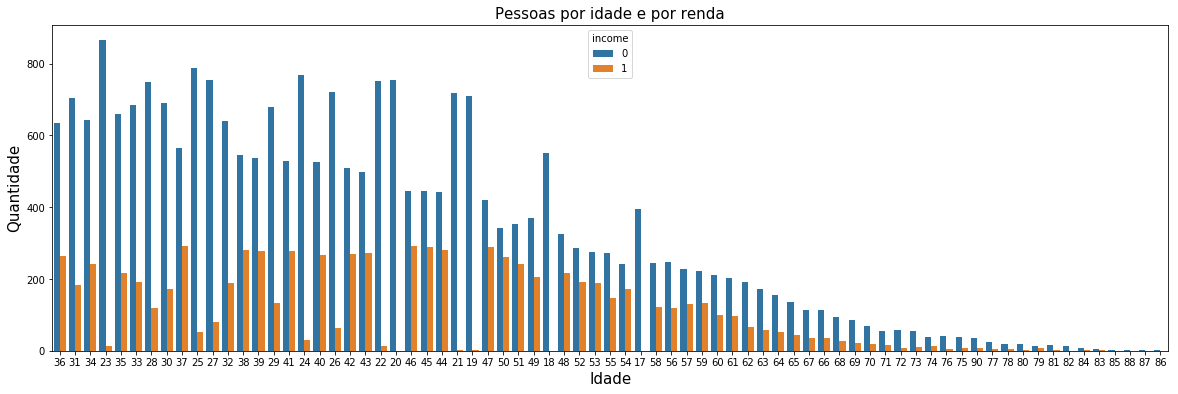

In [100]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=adult,hue='income',order=adult['age'].value_counts(ascending=False).index)
plt.xlabel('Idade',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Pessoas por idade e por renda',size=15)
plt.show()

#Segregando idade por renda

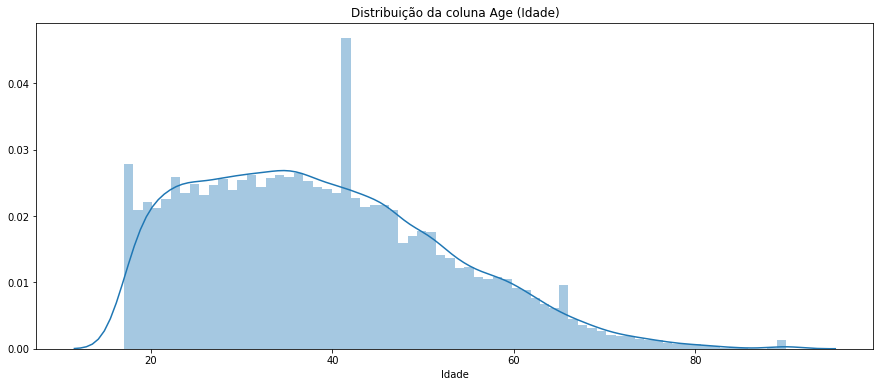

In [101]:
plt.figure(figsize=(15,6))
ax_hist=sns.distplot(adult['age'],bins=70)
plt.xlabel('Idade')
plt.title('Distribuição da coluna Age (Idade)')
plt.show()

#Os dados referente a idade estão concentrado entre 

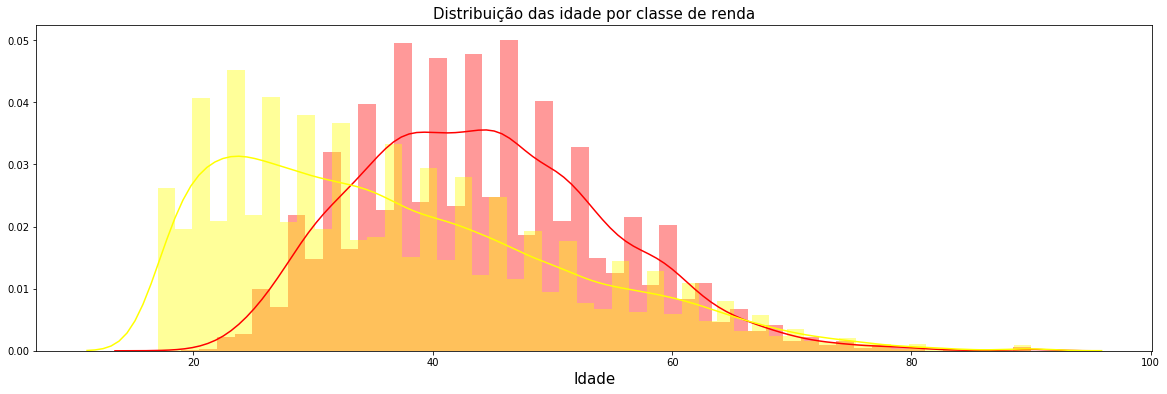

In [102]:
plt.figure(figsize=(20,6))
sns.distplot(adult['age'].loc[adult['income']==1] , color="red", label="Abaixo de US$ 50K")
sns.distplot(adult['age'].loc[adult['income']==0] , color="yellow", label="Acima de US$ 50K")
plt.xlabel('Idade',size=15)
plt.title('Distribuição das idade por classe de renda',size=15)
plt.show()

#O histograma das dados das idade daqueles que ganham abaixo de US$ 50.000 se parece mais com uma distribuição normal
#A idades estão concentradas entre 30 a 50 anos

#Já os dados de idades daqueles que ganham acima de US$ 50.000 parece se concentrar mais até os 40 anos de idade

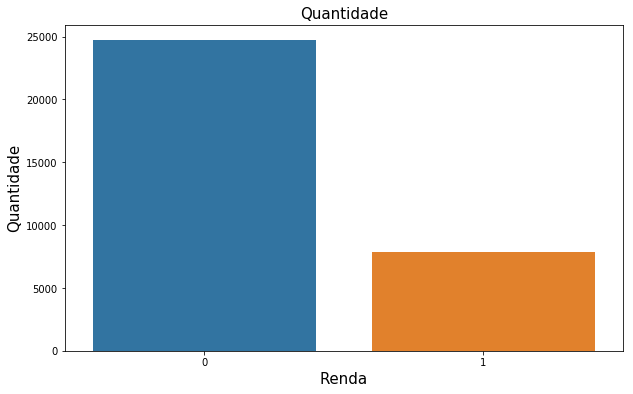

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x='income',data=adult)
plt.xlabel('Renda',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Quantidade',size=15)
plt.show()

#O gráfico de barra a baixo mostra que é mais frequente que pessoas desse conjunto de dados tenham salários abaixo de 50 mil
#dólares. Podemos perceber também que as classes estão desbalanceadas, o que pode ser um problema na hora de colocar o modelo
#para treinar e classificar os dados.

#Trataremos esse problemas mais a frente

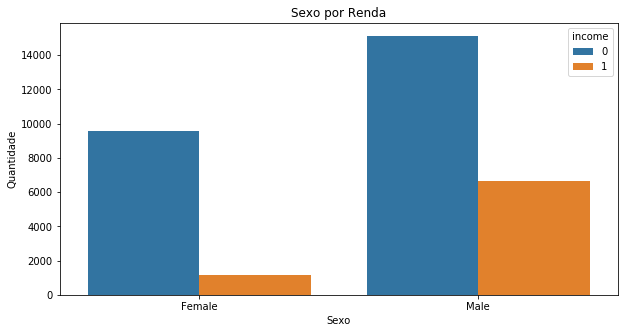

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',data=adult,hue='income',orient="h")
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Sexo por Renda')
plt.show()

#Há mais homens do que mulheres

# Há mais homens que ganham acima de US$ 50.000 do que mulheres

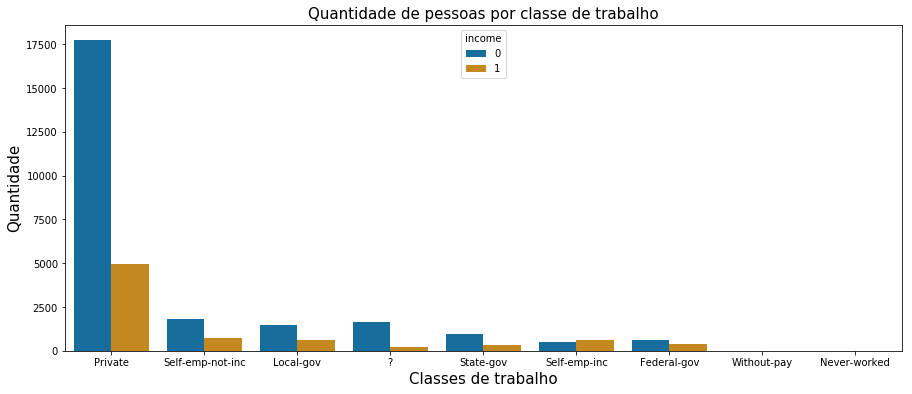

In [105]:
plt.figure(figsize=(15,6))
sns.countplot(x='workclass',data=adult,hue='income',palette='colorblind',order=
              adult['workclass'].value_counts(ascending=False).index)
plt.xlabel('Classes de trabalho',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Quantidade de pessoas por classe de trabalho',size=15)
plt.show()

#A maior parte das pessoas desse censo estão trabahando no setor privado
#Daqueles que trabalham no setor privado, a maioria ganha menos de US$ 50.000


#Dos autônomos que trabalham em entidades corporativas, a maioria recebe acima de US$ 50.000

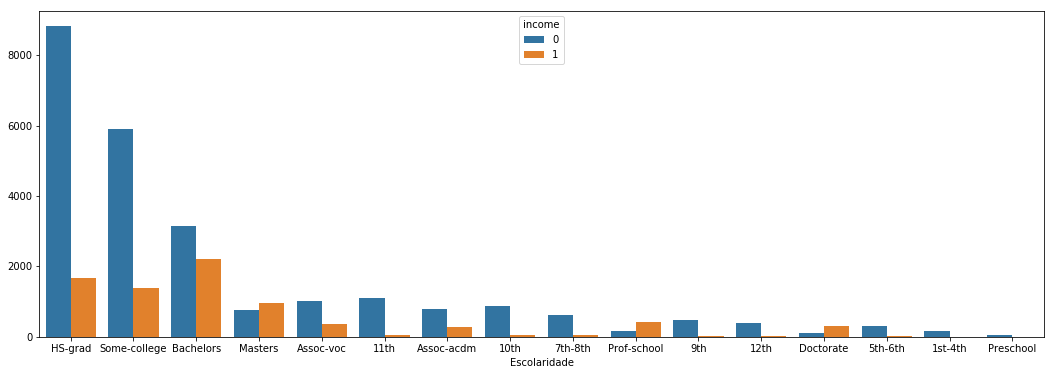

In [106]:
plt.figure(figsize=(18,6))
sns.countplot(x='education',hue='income',data=adult,order =
              adult['education'].value_counts(ascending=False).index)
plt.xlabel('Escolaridade')
plt.ylabel('')
plt.show()

#A grande maioria dos trabalhadores é composta por quem possui ensino médio, some-college (está cursando alguma faculdade) e 
#possui bacharelado.

#Daqueles que recebem acima de US$ 50.000 são maioria entre doutores, professores de escola e mestres.

#Porém a maior parte de quem recebe acima de US$ 50.000 tem ensino médio, cursam/cursaram alguma faculdade, bacharel e mestrado

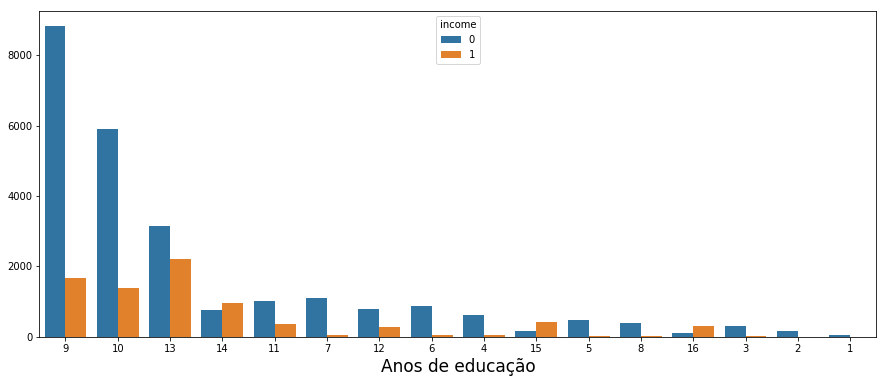

In [107]:
plt.figure(figsize=(15,6))
sns.countplot(x='education.num',hue='income',data=adult,order =
              adult['education.num'].value_counts(ascending=False).index)
plt.xlabel('Anos de educação',size=17)
plt.ylabel('')
plt.show()

#A maior concentração de pessoas que ganham menos de US$ 50.000 são pessoas que tem tempo de educação de 9, 10 e 13 anos

#Dos 14 anos de educação em diante a maior parte dos trabalahdores ganham acima de US$ 50.000, porém a quantidade desses é pouco
#expressiva

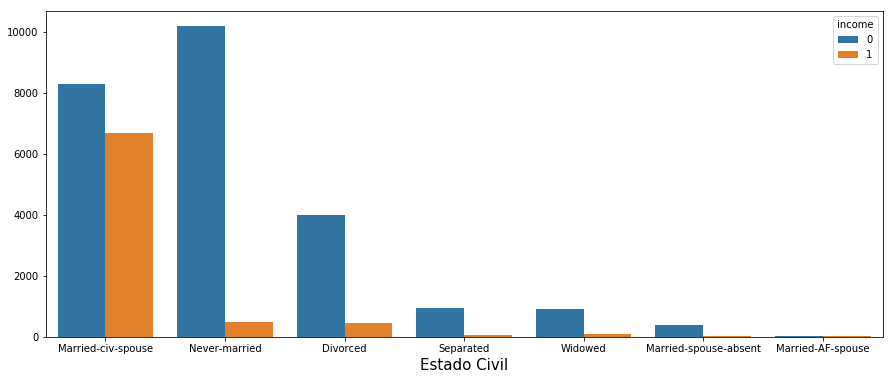

In [108]:
plt.figure(figsize=(15,6))
sns.countplot(x='marital.status',data=adult,hue='income',order =
              adult['marital.status'].value_counts(ascending=False).index)
plt.xlabel('Estado Civil',size=15)
plt.ylabel('')
plt.show()

#A maior parte das pessoas do censo são casados (conjugê civil), solteiros ou divorciados

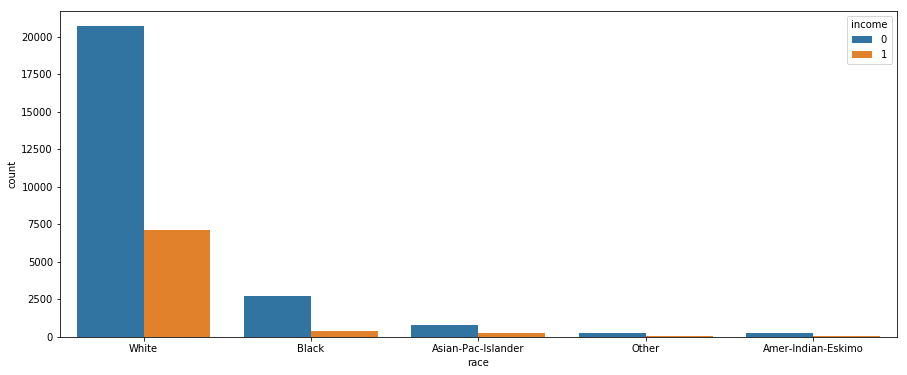

In [109]:
plt.figure(figsize=(15,6))
sns.countplot(x='race',data=adult,hue='income',orient="h")
plt.show()

#A maior parte das pessoas que participaram do censo são em sua maioria de brancos
#E são os brancos que, marjoritariamente, ganham acima de US$ 50.000.

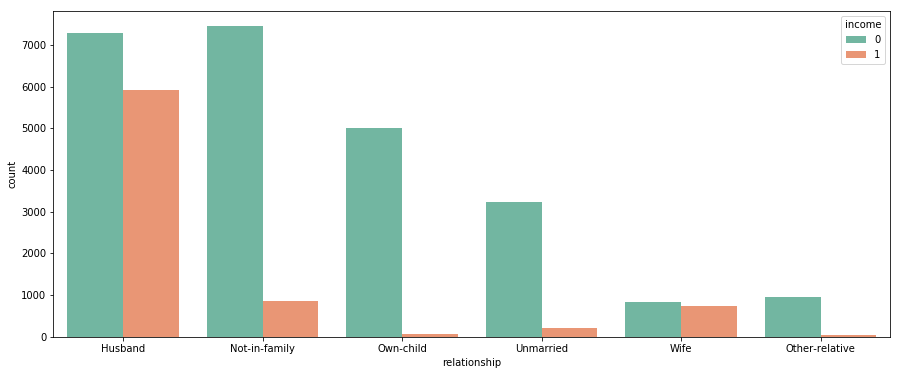

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(x='relationship',hue='income',data=adult,palette='Set2',order =
              adult['relationship'].value_counts(ascending=False).index)
plt.show()

#Quem mais ganha acima de US$ 50.000 são maridos

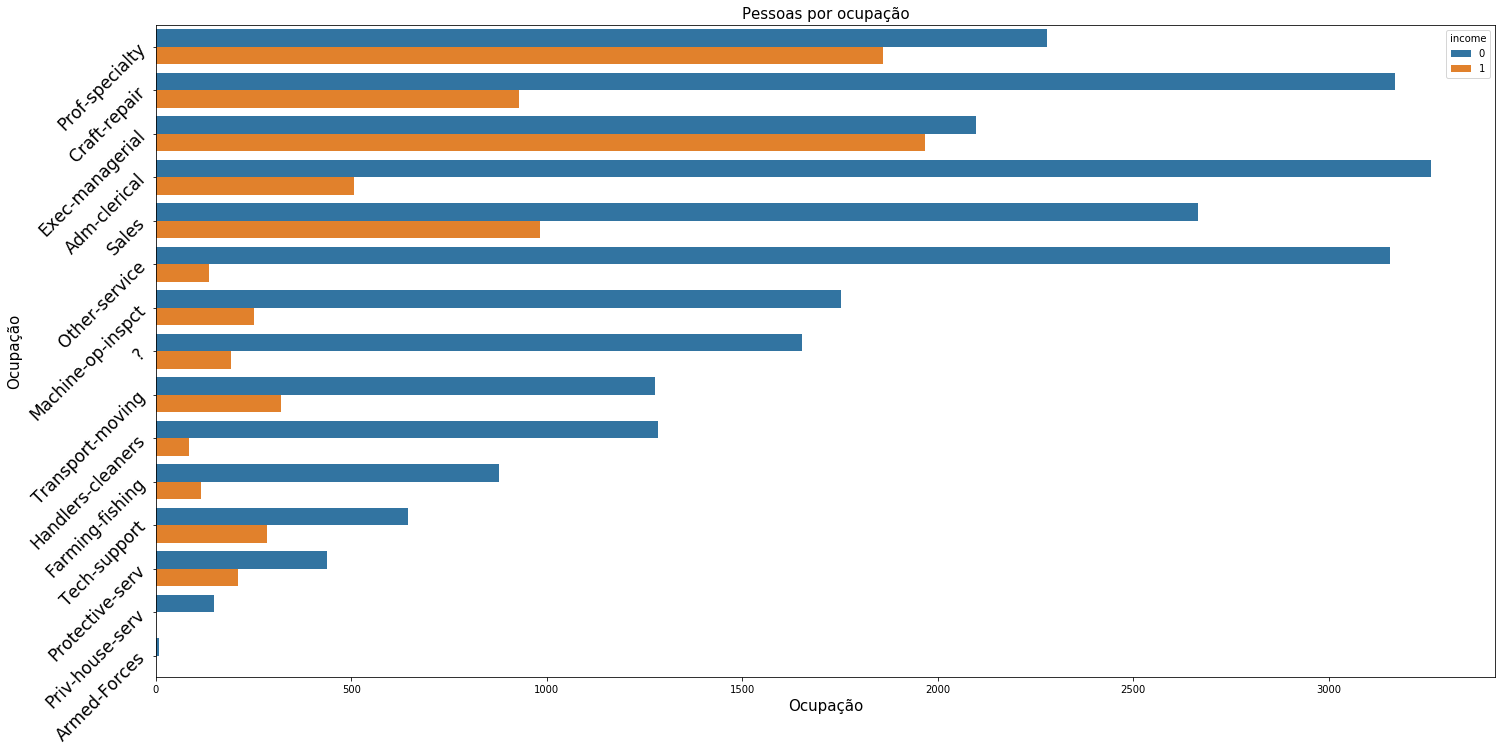

In [111]:
plt.figure(figsize=(24,12))
sns.countplot(y='occupation',data=adult,hue='income',order = adult['occupation'].value_counts(ascending=False).index)
plt.xlabel('Ocupação',size=15)
plt.ylabel('Ocupação',size=15)
plt.title('Pessoas por ocupação',size=15)
plt.yticks(rotation='45',size=17)
plt.show()

# As ocupações que mais recebem acima de US$ 50.000 são : Prof-specialty, Craft-repair, Exec-managerial, Adm-Clerical e Sales

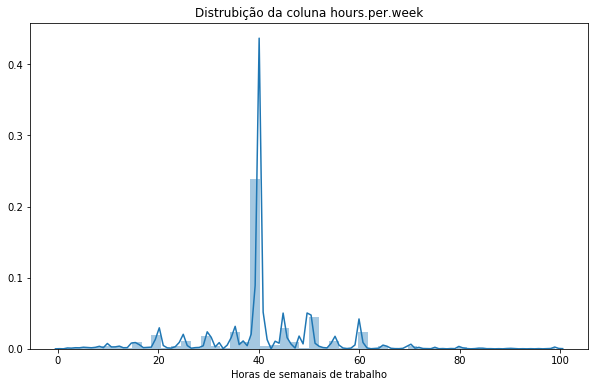

In [112]:
plt.figure(figsize=(10,6))
sns.distplot(adult['hours.per.week'])
plt.xlabel('Horas de semanais de trabalho')
plt.title('Distrubição da coluna hours.per.week')
plt.show()

#A maioria dos indivíduos do censo trabalha 40 horas por semana

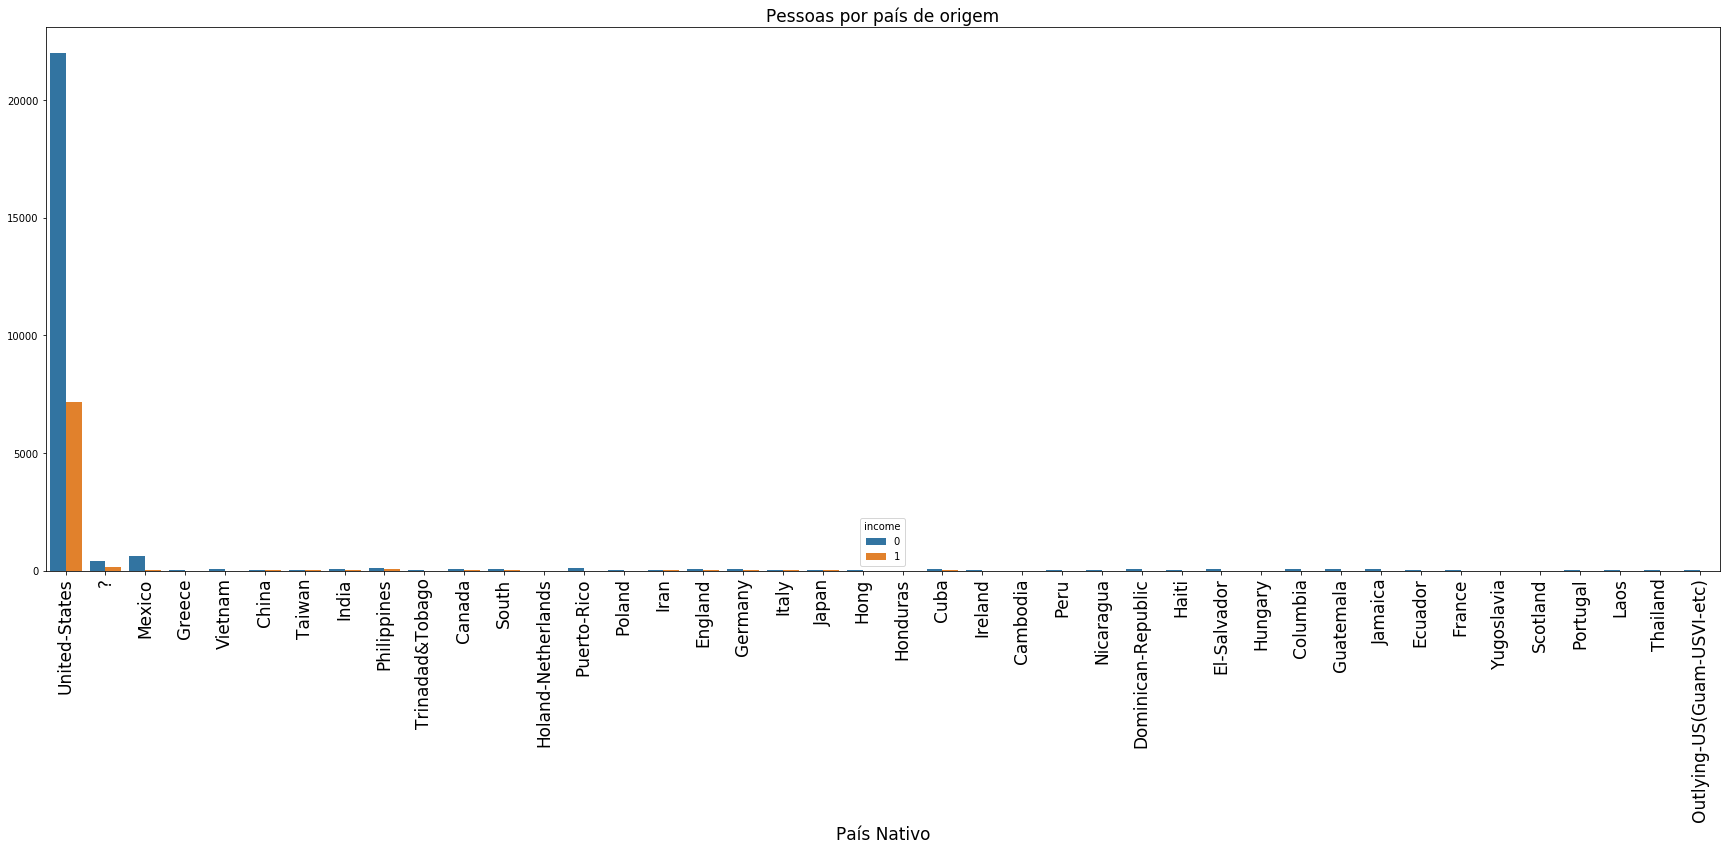

In [113]:
plt.figure(figsize=(30,10))
sns.countplot(x='native.country',hue='income',data=adult)
plt.xlabel('País Nativo',size=17)
plt.ylabel('')
plt.title('Pessoas por país de origem',size=17)
plt.xticks(rotation='90',size=17)
plt.show()

#Marjoritariamente, as pessoas da pesquisa são dos Estados Unidos

#Vemos que não é possível visualizar bem os dados

In [114]:
display(adult['native.country'].unique())
display(len(adult['native.country'].unique()))

#Abaixo podemos ver a listagem de países

#E ao todo, sem os EUA, são 41 países

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

42

In [115]:
#vamos substituir, o que não for United States simplesmente por 'Others'

adult['native.country']=adult['native.country'].replace(['?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],'Others')

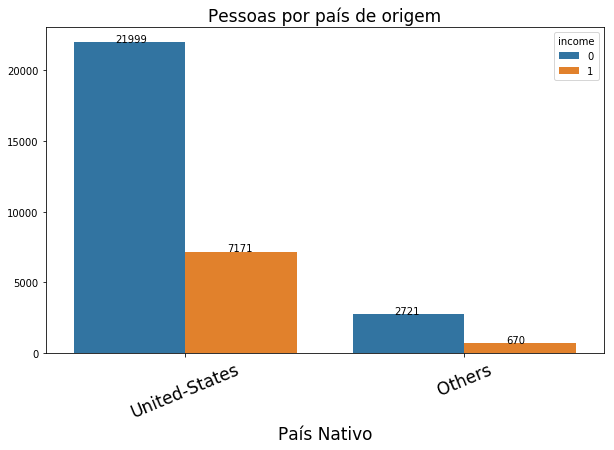

In [116]:
plt.figure(figsize=(10,6))
dx=sns.countplot(x='native.country',hue='income',data=adult)
plt.xlabel('País Nativo',size=17)
plt.ylabel('')
plt.title('Pessoas por país de origem',size=17)
plt.xticks(rotation='22.5',size=17)

for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.show()

#Aqui, mais visível, podemos ver que 

In [117]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

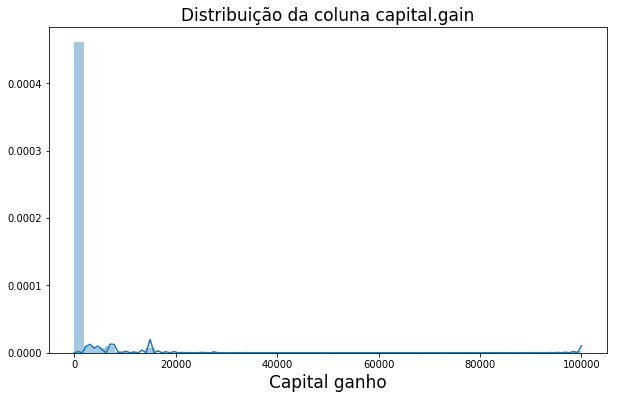

In [118]:
plt.figure(figsize=(10,6))
sns.distplot(adult['capital.gain'])
plt.xlabel('Capital ganho',size=17)
plt.title('Distribuição da coluna capital.gain',size=17)
plt.show()

#Os dados estão concentrados em 0

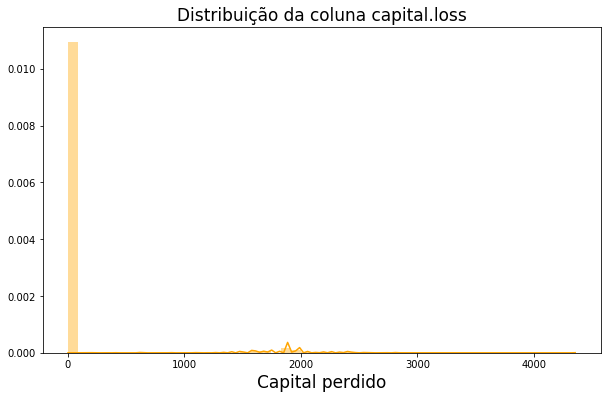

In [119]:
plt.figure(figsize=(10,6))
sns.distplot(adult['capital.loss'],color='orange')
plt.xlabel('Capital perdido',size=17)
plt.title('Distribuição da coluna capital.loss',size=17)
plt.show()

#Assim como anteriormente, os dados estão concentrados em 0

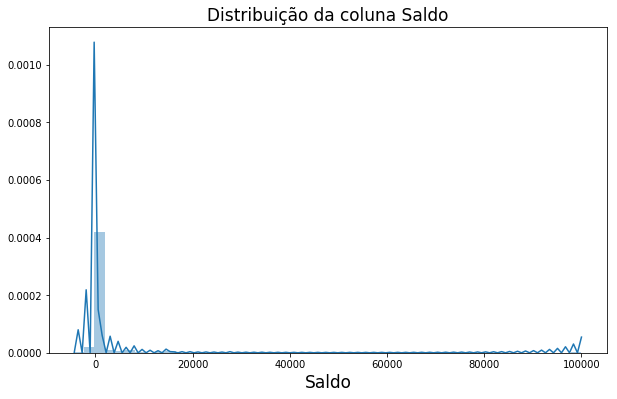

In [120]:
adult['saldo']=adult['capital.gain']-adult['capital.loss']
plt.figure(figsize=(10,6))
sns.distplot(adult['saldo'])
plt.title('Distribuição da coluna Saldo',size=17)
plt.xlabel('Saldo',size=17)
plt.show()

#Dados concentrados em zero, ou seja, o ganho de capital se anulou com a perda de capital

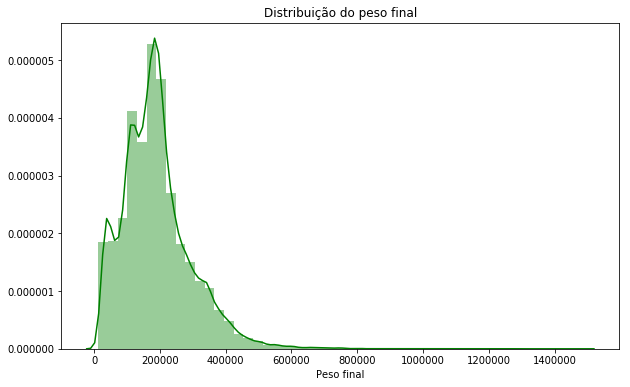

In [121]:
plt.figure(figsize=(10,6))
sns.distplot(adult['fnlwgt'],color='green')
plt.title('Distribuição do peso final')
plt.xlabel('Peso final')
plt.show()

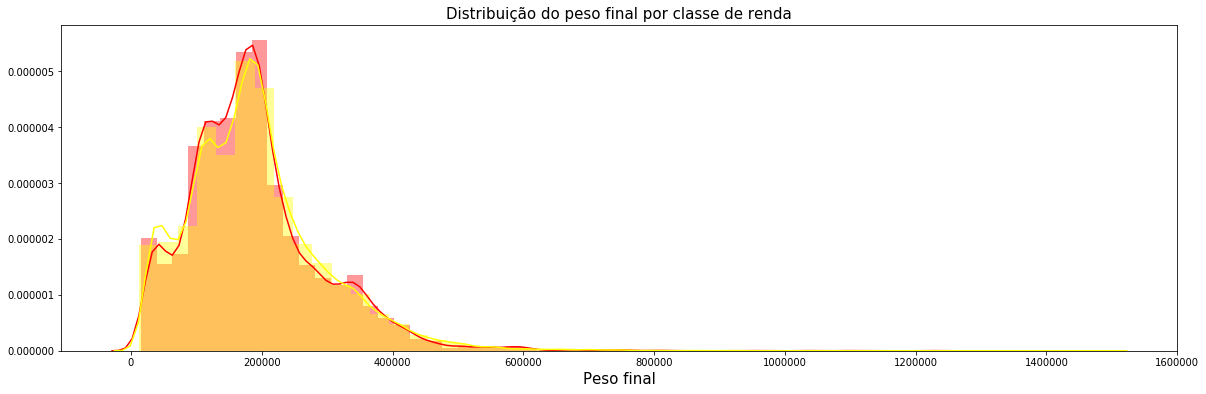

In [122]:
plt.figure(figsize=(20,6))
sns.distplot(adult['fnlwgt'].loc[adult['income']==1] , color="red", label="Abaixo de US$ 50K")
sns.distplot(adult['fnlwgt'].loc[adult['income']==0] , color="yellow", label="Acima de US$ 50K")
plt.xlabel('Peso final',size=15)
plt.title('Distribuição do peso final por classe de renda',size=15)
plt.show()

#As distribuições por classe de renda são bastante semenlhantes

# Tratamento dos dados

In [123]:
adult.info()

#8 colunas são objetos e 8 são valores inteiros 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null int32
saldo             32561 non-null int64
dtypes: int32(1), int64(7), object(8)
memory usage: 3.9+ MB


**Tratando as colunas que são objetos**

In [124]:
adult.columns

#Observando as colunas

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'saldo'],
      dtype='object')

In [125]:
#Selecionando colunas que são objetos e observando seus valores únicos
display(adult.select_dtypes(include='object').nunique())

#Vemos que há algumas colunas que possuem muitos valores categóricos

#workclass possui 9 categorias
#education, 16 categorias
#ocupation, 15 categorias

#Podemos fazer a mesma estratégia que fizemos em native.country que antes tinha 42 categorias, mas agora possui apenas 2

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country     2
dtype: int64

**Tratando a coluna worclass**

In [126]:
adult['workclass'].value_counts()

#Aqui podemos que, novamente, que a categoria Private tem um total de 22696 (69,7%) e os demais somados 9.865 (30.3%)

#Seria interessante então definirmos quem está no setor privado e quem não está

#sendo assim susbtituiremos as demais categorias por NoPrivate

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [127]:
#Substuindo as categorias
adult['workclass']=adult['workclass'].replace(['?','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov',
                                             'Without-pay','Never-worked'],'NoPrivate')

In [128]:
#Vemos que a alteração foi bem sucedida, agora temos apenas duas categorias
adult['workclass']

0        NoPrivate
1          Private
2        NoPrivate
3          Private
4          Private
           ...    
32556      Private
32557      Private
32558      Private
32559      Private
32560      Private
Name: workclass, Length: 32561, dtype: object

In [129]:
adult['workclass']=adult['workclass'].replace(['Private'],1)
adult['workclass']=adult['workclass'].replace(['NoPrivate'],0)

In [130]:
adult['workclass'].value_counts()

1    22696
0     9865
Name: workclass, dtype: int64

**Tratando a coluna education**

In [131]:
adult['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [132]:
# A ordem academica segue a seguinte ordem :

#Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < 
#Some-college < Bachelors < Masters < Doctorate

#dividiremos assim:

#Quem ainda não terminou o ensino médio: Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th e 12th

#Quem terminou o ensino médio: HS-grad e Prof-school

#Quem é associado: Assoc-acdm e Assoc-voc

#Quem fez ou já terminou alguma falcudade: Some-college e Bachelors

#E quem tem pós-graduação: Masters e Doctorate

#Assim teremos 5 categorias e não mais 16

adult['education']=adult['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],0)
adult['education']=adult['education'].replace(['HS-grad','Prof-school'],1)
adult['education']=adult['education'].replace(['Assoc-acdm','Assoc-voc'],2)
adult['education']=adult['education'].replace(['Some-college','Bachelors'],3)
adult['education']=adult['education'].replace(['Masters','Doctorate'],4)

In [133]:
adult['education'].value_counts()
#Como podemos ver, temos apenas 5 classes

3    12646
1    11077
0     4253
2     2449
4     2136
Name: education, dtype: int64

**Tratando a coluna marital.status**

In [134]:
adult['marital.status'].value_counts()
#Aqui temos uma categorias com valores muito pequenos

#Podemos juntar:

#Married-civ-spouse ,Married-AF-spouse e Married-spouse-absent
# Divorced, Separated e Widowed 

#teremos então apenas 3 classes

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [135]:
adult['marital.status']=adult['marital.status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],0)
adult['marital.status']=adult['marital.status'].replace(['Divorced','Separated','Widowed'],1)

In [136]:
adult['marital.status']=adult['marital.status'].replace(['Never-married'],2)

In [137]:
adult['marital.status'].value_counts()

#temos agora 3 categorias, apenas

0    15417
2    10683
1     6461
Name: marital.status, dtype: int64

**Tratando a coluna occupation**

In [138]:
adult['occupation'].value_counts()

#Aqui temos 15 categorias

#Vamos agrupar algumas colunas:

#Other-service, ?,Protective-serv,Priv-house-serv e Armed-Forces vamos chamar de Others

#E ficaremos com 10 categorias

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [139]:
adult['occupation']=adult['occupation'].replace(['Other-service','?',
                                                 'Protective-serv','Priv-house-serv','Armed-Forces'],'Others')

In [140]:
adult['occupation'].value_counts()

Others               5945
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Name: occupation, dtype: int64

In [141]:
#Vamos usar o Label Encoder agora:
from sklearn.preprocessing import LabelEncoder

#Instanciando o Label Encoder
le=LabelEncoder()

adult['occupation']=le.fit_transform(adult['occupation'])
adult['occupation'].value_counts()

6     5945
7     4140
1     4099
2     4066
0     3770
8     3650
5     2002
10    1597
4     1370
3      994
9      928
Name: occupation, dtype: int64

**Tratando a coluna relationship**

In [142]:
adult['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [143]:
#Como em relationship temos 6 classe, vamos deixar do jeito que está

adult['relationship']=le.fit_transform(adult['relationship'])
adult['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

**Tratando a coluna race**

In [144]:
adult['race'].value_counts()

#Marjoritariamente há mais brancos

#Vamos agrupar Black, Asian, Amer e Other em uma única categoaria

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [145]:
adult['race']=adult['race'].replace(['Black','Asian-Pac-Islander',
                                                 'Amer-Indian-Eskimo','Other'],0)

adult['race']=adult['race'].replace('White',1)

In [146]:
adult['race'].value_counts()

1    27816
0     4745
Name: race, dtype: int64

**Tratando a coluna sex**

In [147]:
adult['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [148]:
adult['sex']=le.fit_transform(adult['sex'])
adult['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

**Tratando a coluna native.country**

In [149]:
adult['native.country'].value_counts()

United-States    29170
Others            3391
Name: native.country, dtype: int64

In [150]:
adult['native.country']=le.fit_transform(adult['native.country'])
adult['native.country'].value_counts()

1    29170
0     3391
Name: native.country, dtype: int64

In [151]:
adult['native.country'].value_counts()

1    29170
0     3391
Name: native.country, dtype: int64

**Tratando as colunas capital.gain, capital.loss e saldo**

In [152]:
adult[['capital.gain','capital.loss','saldo']].head()
#Visualizando as colunas capital.gain, capital.loss e saldo

#Saldo é a diferença entre gain e loss

,capital.gain,capital.loss,saldo
0,0,4356,-4356
1,0,4356,-4356
2,0,4356,-4356
3,0,3900,-3900
4,0,3900,-3900


In [153]:
adult.loc[ adult['saldo'] <= 0, 'saldo'] = 0
adult.loc[ adult['saldo'] > 0, 'saldo'] = 1

#Aqui substituiremos, onde saldo for menor igual a zero, é porque houve perda ou não ganho de capital

In [154]:
adult[['capital.gain','capital.loss','saldo']].head()

#Visualizando novamente

,capital.gain,capital.loss,saldo
0,0,4356,0
1,0,4356,0
2,0,4356,0
3,0,3900,0
4,0,3900,0


In [155]:
adult['saldo'].value_counts()

#Aqui vemos que temos apenas 2 categorias onde, a maioria das pessoas, não ganharam ou perderam capital

0    29849
1     2712
Name: saldo, dtype: int64

In [156]:
adult['saldo']=adult['saldo'].astype(int)
#Transformando em int

In [157]:
adult=adult.drop(['capital.gain','capital.loss'],axis=1)

#Excluindo as colunas capital.gain e capital.loss

**Tratando a coluna hours.per.week**

In [158]:
#Na coluna hours.per.week vimos que temos horas por trabalho que em sua maioria estão concentrados em 40h
#Mas há aqueles que trabalham menos que 40h e aqueles que trabalham mais de 40h

#Por isso vamos criar 3 classes: abaixo de 40h, igual a 40h e acima de 40h

adult.loc[ adult['hours.per.week'] < 40, 'hours.per.week'] = 0
adult.loc[ adult['hours.per.week'] == 40, 'hours.per.week'] = 1
adult.loc[ adult['hours.per.week'] > 40, 'hours.per.week'] = 2

In [159]:
adult['hours.per.week'].value_counts()

#Abaixo, como já visto anteriormente, que a classe 1 que é igual a 40h é a que mais tem observações

1    15217
2     9581
0     7763
Name: hours.per.week, dtype: int64

In [160]:
adult.head()
#dataset modificado

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,saldo
0,90,0,77053,1,9,1,6,1,1,0,1,1,0,0
1,82,1,132870,1,9,1,2,1,1,0,0,1,0,0
2,66,0,186061,3,10,1,6,4,0,0,1,1,0,0
3,54,1,140359,0,4,1,5,4,1,0,1,1,0,0
4,41,1,264663,3,10,1,7,3,1,0,1,1,0,0


In [161]:
#Padronização dos dados de idade

adult['age']=(adult['age']-adult['age'].mean())/adult['age'].std()

In [162]:
#Padronização dos dados de pesos finais

adult['fnlwgt']=(adult['fnlwgt']-adult['fnlwgt'].mean())/adult['fnlwgt']

In [163]:
adult.head()

#dataset com a última modificação

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,saldo
0,3.769554,0,-1.462959,1,9,1,6,1,1,0,1,1,0,0
1,3.183063,1,-0.428301,1,9,1,2,1,1,0,0,1,0,0
2,2.010079,0,-0.019979,3,10,1,6,4,0,0,1,1,0,0
3,1.130342,1,-0.352093,0,4,1,5,4,1,0,1,1,0,0
4,0.177293,1,0.282943,3,10,1,7,3,1,0,1,1,0,0


# Separando dados de treino e teste

In [164]:
#Váriável de classe
y=adult['income']

#Features
X=adult.drop('income',axis=1)

In [166]:
#contagem das classes em income
np.bincount(y)

array([24720,  7841], dtype=int64)

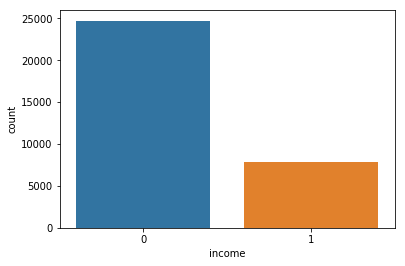

In [167]:
ax=sns.countplot(x=y)
#Como observado anteriormente as classes estão desbalanceadas. Há mais sobre aqueles que ganham abaixo de US$ 50.000 do que os
#que ganham acima desse valor, o que pode trazer problemas para a precisão e acurácia do modelo, pois, provavelmente, ele irá
#aprender mais de uma classe do que de outra, e , consequentemente, conseguirá prevar mais de uma do que de outras

In [165]:
#Para isso usaremos o SMOTE, que é uma técnica que irá gerar amostras artificiais e essas amostras serão usadas para treinar 
#o modelos

#Importando o SMOTE
from imblearn.over_sampling import SMOTE

In [168]:
#Instanciando o SMOTE
smt=SMOTE()

#Treinando o Algoritmo
X,y=smt.fit_sample(X,y)

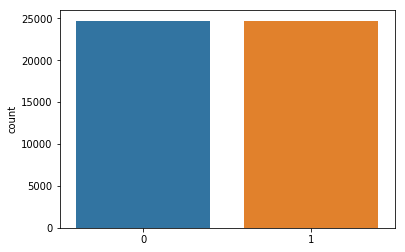

In [169]:
#Abaixo podemos ver que a classe 1 teve uma aumento, o número de observações entre as classes foi igualado

#Uma desvantagem dessa técnica é que pode gerar overfitting ou sobreajuste do modelo e isso será analisado adiante

np.bincount(y)
ax=sns.countplot(x=y)

In [170]:
#Verificando o shape (ou dimensões)
display(y.shape,X.shape)

(49440,)

(49440, 13)

In [171]:
#Importando módulo para separar dados de treino e teste
from sklearn.model_selection import train_test_split

#Separando os dados de treino e teste
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,random_state=42,test_size=0.2)

In [172]:
#Dimensão dos conjuntos de treino e teste
display(X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape)

(39552, 13)

(9888, 13)

(39552,)

(9888,)

# Baseline do modelo

In [173]:
#Antes de irmos para os modelos iremos gerar a baseline desse projeto.

#Usaremos o modelo de classificação mais simples que existe e determinaremos o mínimo de acurácia para os modelos treinados e 
#testados

#importando módulo Dummy Classifier
from sklearn.dummy import DummyClassifier

#Instanciando o modelo
dummy = DummyClassifier(strategy='uniform', random_state=42)

#treinando o modelo
dummy.fit(X_treino, y_treino)

#verificando o desempeho do modelo
dummy.score(X_teste, y_teste)

#A baseline do modelo é 49.58%

#A acurácia do nosso modelo deve ser tão boa quanto esse valor

0.4958535598705502

# Modelos de Classificação

Vamos usar 10 modelos de classificação, que serão:

1) Regressão Logística;

2) SVM

3) X Gradiente Boost

4) Random Forest

5) Decision Tree

6) Stochastic Gradient Descent

7) K-nearest neighbor

8) GaussianNB

9) Extra-trees

10) Multilayer Perceptron

In [174]:
#Importando dos módulos dos modelos

#regessão logística
from sklearn.linear_model import LogisticRegression
#support vector machine
from sklearn import svm
#xgboost
import xgboost as xgb 
#Floresta randômica
from sklearn.ensemble import RandomForestClassifier
#Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier
#KNN
from sklearn.neighbors import KNeighborsClassifier
#naive bayes
from sklearn.naive_bayes import GaussianNB
#Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
#multilayer perceptron
from sklearn.neural_network import MLPClassifier


#Importação dos módulos de avaliação

#Plotar as matrizes de confusão
from sklearn.metrics import plot_confusion_matrix

#Para gerar as acurácias dos modelos
from sklearn.metrics import accuracy_score

#Fazer o cross validation dos modelos
from sklearn.model_selection import cross_val_predict

#Gerar as métricas de avaliaçãos dos modelos
from sklearn.metrics import classification_report

#Plotar as curvas ROC dos modelos
from sklearn.metrics import plot_roc_curve

#evitar mensagens de erro
import warnings
warnings.filterwarnings("ignore")

# Modelo de regressão logística

In [175]:
#Aplicando o modelo Logistic Regression

#intanciando e treinando o modelo de regressão logística
AdultLR=LogisticRegression().fit(X_treino, y_treino)

#gerando as previsões
y_pred_lr=AdultLR.predict(X_teste)

#visualizando as previsões
print(y_pred_lr)

[0 0 0 ... 0 1 1]


**Avaliando o modelo de Regressão Logística**

In [176]:
#Acuárica do modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_lr)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score(y,cross_val_predict(AdultLR,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 80.067


None

Acurácia do modelo com Validação cruzada: 79.511


None

**Matriz de confusão para o modelo de Regressão Logística**

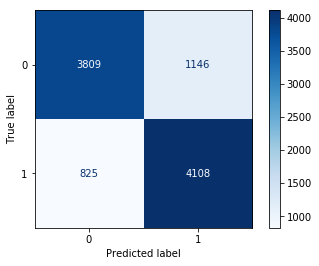

In [177]:
disp=plot_confusion_matrix(AdultLR,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, a regressão logística acertou 3809 e errou 1146
#Para a classe 1, a regressão logística acertou 4108 e errou 825

**Traing score e Test score**

In [178]:
#Testing e Training Score
display(AdultLR.score(X_treino,y_treino))
display(AdultLR.score(X_teste,y_teste))

0.8016282362459547

0.8006674757281553

**Métricas de avaliação**

In [179]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultLR,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79     24720
           1       0.77      0.84      0.80     24720

    accuracy                           0.80     49440
   macro avg       0.80      0.80      0.79     49440
weighted avg       0.80      0.80      0.79     49440



# Support Vector Machine

In [180]:
#Instanciando, treinando e gerando previsões com o modelo

Adultsvm=svm.SVC().fit(X_treino,y_treino)
y_pred_svm=Adultsvm.predict(X_teste)
print(y_pred_svm)

[0 0 0 ... 0 1 1]


**Avaliando o modelo SVM**

In [182]:
#Acurácia do modelo SVM sem e com cross validation

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_svm)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(Adultsvm,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 81.311


None

Acurácia do modelo com Validação cruzada: 80.839


None

**Matriz de confusão do modelo SVM**

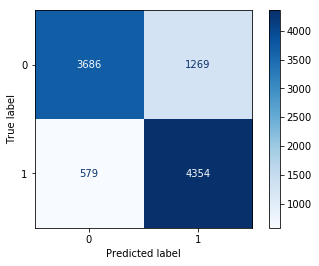

In [183]:
disp=plot_confusion_matrix(Adultsvm,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo SVM acertou 3686 e errou 1269
#Para a classe 1, o modelo SVM acertou 4354 e errou 579

**Training score e test score**

In [184]:
#Testing e Training Score
display(Adultsvm.score(X_treino,y_treino))
display(Adultsvm.score(X_teste,y_teste))

0.8157362459546925

0.8131067961165048

**Métricas de Avaliação**

In [185]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(Adultsvm,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     24720
           1       0.76      0.89      0.82     24720

    accuracy                           0.81     49440
   macro avg       0.82      0.81      0.81     49440
weighted avg       0.82      0.81      0.81     49440



# XGBOOST

In [186]:
#Instanciando e treinando o modelo
AdultXGB = xgb.XGBClassifier().fit(X_treino,y_treino)
y_pred_xgb = AdultXGB.predict(X_teste)

#Acurácia do modelo, sem e com cross validation

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_xgb)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultXGB,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 88.774


None

Acurácia do modelo com Validação cruzada: 87.227


None

**Matriz de confusão do modelo XGBoost**

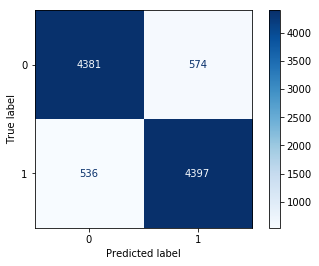

In [187]:
disp=plot_confusion_matrix(AdultXGB,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo XGBoost acertou 4381 e errou 574
#Para a classe 1, o modelo acertou 4397 e errou 536

**Training score e testing score**

In [188]:
#Testing e Training Score
display(AdultXGB.score(X_treino,y_treino))
display(AdultXGB.score(X_teste,y_teste))

0.9180572411003236

0.8877427184466019

**Métricas de avaliação**

In [189]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultXGB,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     24720
           1       0.86      0.89      0.87     24720

    accuracy                           0.87     49440
   macro avg       0.87      0.87      0.87     49440
weighted avg       0.87      0.87      0.87     49440



# Random Forest

In [190]:
#Intanciando, treinando e gerando previsões com o modelo
AdultRF= RandomForestClassifier().fit(X_treino,y_treino)
y_pred_rf = AdultRF.predict(X_teste)

#Acurácia sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_rf)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultRF,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 88.269


None

Acurácia do modelo com Validação cruzada: 87.72


None

**Matriz de confusão do Random Forest**

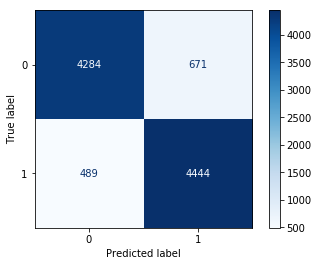

In [191]:
disp=plot_confusion_matrix(AdultRF,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo Random Forest acertou 4284 e errou 671
#Para a classe 1, acertou 4444 e errou 489

**Training score e testing score**

In [192]:
#Testing e Training Score
display(AdultRF.score(X_treino,y_treino))
display(AdultRF.score(X_teste,y_teste))

0.9999241504854369

0.8826860841423948

**Métricas de avaliação do Random Forest**

In [193]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultRF,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     24720
           1       0.85      0.91      0.88     24720

    accuracy                           0.88     49440
   macro avg       0.88      0.88      0.88     49440
weighted avg       0.88      0.88      0.88     49440



# Árvore de Decisão

In [194]:
#Instanciando e treinando o modelo
AdultDT= DecisionTreeClassifier().fit(X_treino,y_treino)

#gerando as previsões do modelo
y_pred_dt = AdultDT.predict(X_teste)

#Acurácia do modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_dt)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultDT,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.91


None

Acurácia do modelo com Validação cruzada: 83.064


None

**Matriz de confusão da Decision Tree**

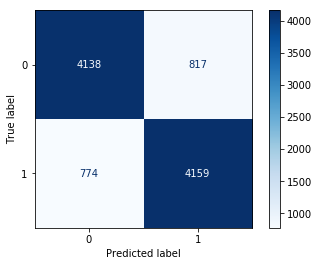

In [195]:
disp=plot_confusion_matrix(AdultDT,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo Decision Tree acertou 4138 e errou 817
#para a classe 1, o modelo acertou 4159 e errou 774

**Training score e testing score**

In [196]:
#Testing e Training Score
display(AdultDT.score(X_treino,y_treino))
display(AdultDT.score(X_teste,y_teste))

0.9999494336569579

0.8390978964401294

**Métricas de Avaliação da Decision Tree**

In [197]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultDT,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     24720
           1       0.82      0.85      0.83     24720

    accuracy                           0.83     49440
   macro avg       0.83      0.83      0.83     49440
weighted avg       0.83      0.83      0.83     49440



# SGD (Stochastic Gradient Descent)

In [198]:
#Instanciando e treinando o modelo de SGD
AdultSGD= SGDClassifier().fit(X_treino,y_treino)

#gerando as previsões
y_pred_sgd = AdultSGD.predict(X_teste)

#Acurácia do modelo SGD sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_sgd)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultSGD,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 75.354


None

Acurácia do modelo com Validação cruzada: 78.685


None

**Matriz de confusão do modelo SGD**

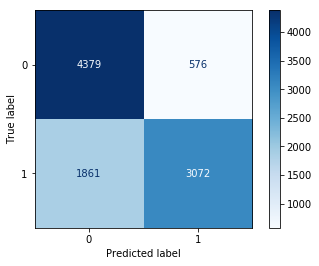

In [199]:
disp=plot_confusion_matrix(AdultSGD,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo SGD acertou 4379 e errou 576
#Para a classe 1, acertou 3072 e errou 1861

**Training score e testing score**

In [200]:
#Testing e Training Score
display(AdultSGD.score(X_treino,y_treino))
display(AdultSGD.score(X_teste,y_teste))

0.7600374190938511

0.7535396440129449

**Métricas de avaliação do modelo SGD**

In [201]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultSGD,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78     24720
           1       0.77      0.82      0.79     24720

    accuracy                           0.78     49440
   macro avg       0.79      0.78      0.78     49440
weighted avg       0.79      0.78      0.78     49440



# KNN

In [202]:
#Instanciando e treinando o modelo
AdultKNN= KNeighborsClassifier().fit(X_treino,y_treino)

#gerando as preisões do modelo KNN
y_pred_knn = AdultDT.predict(X_teste)


#Acurácia do modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_knn)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultKNN,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.91


None

Acurácia do modelo com Validação cruzada: 85.494


None

**Matriz de confusão do modelo KNN**

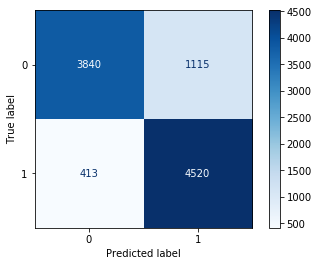

In [203]:
disp=plot_confusion_matrix(AdultKNN,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo KNN acertou 3840 e errou 1115
#para a classe 1, acertou 4250 e errou 413

**Training score e testing score**

In [204]:
#Testing e Training Score
display(AdultKNN.score(X_treino,y_treino))
display(AdultKNN.score(X_teste,y_teste))

0.8942152103559871

0.8454692556634305

**Métricas de avaliação do modelo KNN**

In [205]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultKNN,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     24720
           1       0.81      0.93      0.87     24720

    accuracy                           0.85     49440
   macro avg       0.86      0.85      0.85     49440
weighted avg       0.86      0.85      0.85     49440



# Naive Bayes Gaussiano

In [206]:
#Instanciando e treinando o modelo
AdultNB= GaussianNB().fit(X_treino,y_treino)

#gerando as previsões
y_pred_nb = AdultNB.predict(X_teste)

#Acurácia do modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_nb)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultNB,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 77.468


None

Acurácia do modelo com Validação cruzada: 76.559


None

**Matriz de confusão do modelo Naive Bayes**

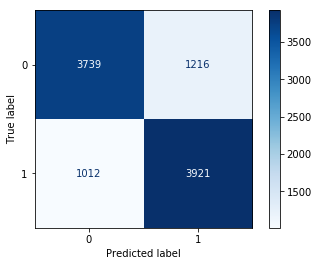

In [207]:
disp=plot_confusion_matrix(AdultNB,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo Naive Bayes acertou 3739 e errou 1216
#Para a classe 1, o modelo acertou 3921 e errou 1012

**Training score e testing score**

In [208]:
#Testing e Training Score
display(AdultNB.score(X_treino,y_treino))
display(AdultNB.score(X_teste,y_teste))

0.7739684466019418

0.7746763754045307

**Métricas de Avaliação do modelo Naive Bayes**

In [209]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultNB,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     24720
           1       0.76      0.77      0.77     24720

    accuracy                           0.77     49440
   macro avg       0.77      0.77      0.77     49440
weighted avg       0.77      0.77      0.77     49440



# EXTRA TREE

In [210]:
#Instanciando e treinando o modelo Extra Tree
AdultET=ExtraTreesClassifier().fit(X_treino,y_treino)

#gerando as previsões
y_pred_et =AdultET.predict(X_teste)

#Acurácia de modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_et)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultET,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 88.248


None

Acurácia do modelo com Validação cruzada: 87.987


None

**Matriz de confusão da Extra Tree**

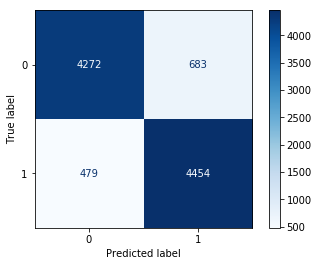

In [211]:
disp=plot_confusion_matrix(AdultET,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo Extra Tree acertou 4272 e errou 683
#Para a classe 1, acertou 4454 e errou 479

**Training score e testing score**

In [212]:
#Testing e Training Score
display(AdultET.score(X_treino,y_treino))
display(AdultET.score(X_teste,y_teste))

0.9999494336569579

0.8824838187702265

**Métricas de avaliação do modelo Extra Tree**

In [213]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultET,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88     24720
           1       0.85      0.92      0.88     24720

    accuracy                           0.88     49440
   macro avg       0.88      0.88      0.88     49440
weighted avg       0.88      0.88      0.88     49440



# MLP (Multilayer Perceptron)

In [214]:
#instanciando e treinando o MLP
AdultMLP= MLPClassifier().fit(X_treino,y_treino)

#gerando as previsões
y_pred_mlp= AdultMLP.predict(X_teste)

#Acurácia do modelo sem e com cross validation
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_mlp)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultMLP,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.465


None

Acurácia do modelo com Validação cruzada: 82.854


None

**Matriz de confusão do MLP**

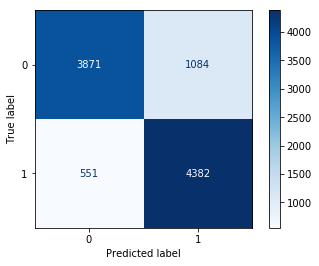

In [215]:
disp=plot_confusion_matrix(AdultMLP,X_teste,y_teste,cmap='Blues',values_format='.5g')

#Para a classe 0, o modelo MLP acertou 3871 e errou 1084
#Para a classe 1, acertou 4382 e errou 551

**Training score e testing score**

In [216]:
#Testing e Training Score
display(AdultMLP.score(X_treino,y_treino))
display(AdultMLP.score(X_teste,y_teste))

0.8490847491909385

0.8346480582524272

**Métricas de avaliação do MLP**

In [219]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultMLP,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     24720
           1       0.80      0.88      0.84     24720

    accuracy                           0.83     49440
   macro avg       0.83      0.83      0.83     49440
weighted avg       0.83      0.83      0.83     49440



# Curva ROC

A curva ROC mostra o quão bom modelo consegue distinguir entre as classes, que nosso caso é 0 (de abaixo de USS 50.000) e 1 (acima de USS 50.000). 

Observando a curva ROC, vemos que os melhores modelos (que passam de 0.9) são os modelos **XGBClassifier**, RandomForestClassifier, KNeighborsClassifier, ExtraTresClassifier e MLPClassifier

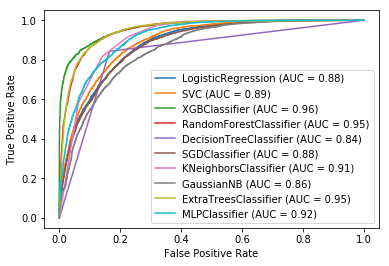

In [220]:
disp=plot_roc_curve(AdultLR,X_teste,y_teste)
plot_roc_curve(Adultsvm,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultXGB,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultRF,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultDT,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultSGD,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultKNN,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultNB,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultET,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultMLP,X_teste,y_teste, ax=disp.ax_);

# CONCLUSÃO

**TABELA COMPARATIVA**

Na tabela abaixo podemos observar o desempenho de cada modelo.


|  || Acurácia || Acurácia CV  || train score || test score || Over ou Under    ||  Precision 0 ||Precision 1|| AUC ||
|:--------:||:-----------:||:------------:||:-----------:||:-----------:||:------------:||:------------:||:---------:||:---:||
|Reg. Log   || 80.067     ||  79.511      ||   80.162    ||  80.066     ||   Não        ||  82          ||  77       ||  88 ||
|SVM        || 81.311     ||  80.839      ||  81.573     ||  81.31      ||   Não        ||  87          ||  76       ||  89 ||
|XGBoost    || 88.774     || 87.227       ||  91.18      ||    88.774   ||   Não        || 88           || 86        ||  96 ||
|Ran. Forest|| 88.269     || 87.72        ||   99.99     ||  88.26      || Overfitting  ||   90         ||  85       || 95  ||
|Dec. Tree  || 83.91      ||  83.064      ||   99.99     ||  83.9       || Overfitting  ||    85        ||   82      ||  84 ||
|SGD        || 75.354     ||  78.685      ||    76       ||    75.35    || Underfitting ||   80         ||   77      || 88  ||
|KNN        ||  83.91     ||  85.494      ||    89.42    ||    84.54    ||  Não         ||    92        ||   81      ||  91 ||
|Naive Bayes||  77.468    ||  76.559      ||   77.39     ||   77.47     || Underfitting ||   77         ||   79      ||  86 ||
|Extra Tree || 88.248     ||  87.987      ||  99.99      ||   88.24     || Overfitting  ||   91         ||  85       || 95  ||
|MLP        ||  83.465    ||  82.854      ||   84.9      ||   83.46     ||  Não         ||   86         ||   80      || 92  ||

Acima podemos ver que há modelo, que quando foi aplicado o SMOTE acabaram tendo overfitting, ou seja, um sobreajuste do modelo. Vemos isso pela diferença entre o train score e o test score que (por arbitrariedade) tiveram uma diferença superior a 10 pontos, que foram os modelos Random Forest, Decision Tree e Extra Tree. Por esse motivo estamos descartando esses modelos, mesmo obtendo bons desempenhos. O sobreajuste (overfitting) atrapalha que o modelo se torne generalizável.

Outros dois modelos possuem suspeita de underfitting (quando o modelo não aprende bem com os dados) o que também impede sua generalização. Podemos perceber isso, pois esses modelos possuem os menores test scores e train scores.

Restam-nos então 5 modelos, que não apresentaram nenhum dos problemas acima.

|  || Acurácia || Acurácia CV  || train score || test score || Over ou Under    ||  Precision 0 ||Precision 1|| AUC ||
|:--------:||:-----------:||:------------:||:-----------:||:-----------:||:------------:||:------------:||:---------:||:---:||
|**XGBoost**||**88.774**  ||**87.227**    ||**91.18**    || **88.774**  || **Não**      || **88**       || **86**  || **96**||
|KNN        ||  83.91     ||  85.494      ||    89.42    ||    84.54    ||  Não         ||    92        ||   81      ||  91 ||
|MLP        ||  83.465    ||  82.854      ||   84.9      ||   83.46     ||  Não         ||   86         ||   80      || 92  ||
|SVM        || 81.311     ||  80.839      ||  81.573     ||  81.31      ||   Não        ||  87          ||  76       ||  89 ||
|Reg. Log   || 80.067     ||  79.511      ||   80.162    ||  80.066     ||   Não        ||  82          ||  77       ||  88 ||


Desses modelos o melhor foi o XGBoost, pois obteve a melhor acurácia, não apresentou nem sobreajuste nem subajuste, teve precisões para as classes próximas do 90% e com valores aproximados, e teve o maior AUC; os recalls e f1-score também possuem valores próximo. E, por fim, esse modelo está bem acima da acurácia mínima de 49.58%.